# Bias and Variance

## Overview
> * Objective 01 - Define and extract bias
> * Objective 02 - Define and determine variance
> * Objective 03 - Differentiate overfit vs underfit models
> * Objective 04 - Consider the bias/variance tradeoff in linear regression

Throughout this week, we've learned:
- How to use OLS to fit a model 
- How to determine the correlation between independent features. 

One thing we haven't discussed is how to measure teh performance of a regression model. 
- What makes a good model? 
- What makes a bad model? 
- Between two models, which should we pick and why? 


###  Four Assumptions of Linear Regression
(This may come up in interviews) 

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

[Source](https://www.statology.org/linear-regression-assumptions/)

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
#Import the Longbones.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

#Drop records with NAs and rename the dataset longbones

longbones = df.dropna()

longbones.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0
5,1,68.0,7.0,1,28.0,3.93,0
6,1,71.6,8.0,1,35.0,3.88,0
7,1,70.2,6.0,1,44.0,3.64,0


In [6]:
import statsmodels.api as sm

#Enter the model in the format Y ~ X

model = ols('Time ~ Nitro', data=longbones).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     26.96
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.05e-05
Time:                        15:10:39   Log-Likelihood:                -141.08
No. Observations:                  35   AIC:                             286.2
Df Residuals:                      33   BIC:                             289.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.8053     50.679      6.251      0.0

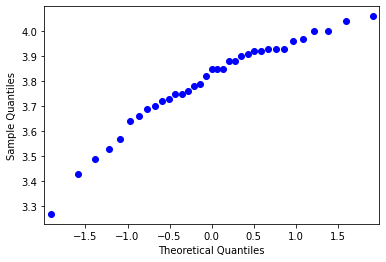

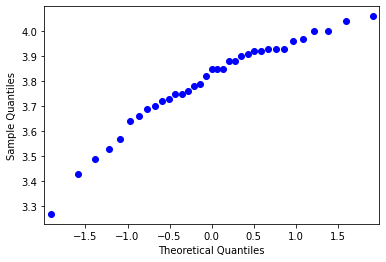

In [10]:
sm.qqplot(longbones['Nitro'])

We calculated a specific data point's residual in a linear model:

$true - predicted = residual$ 

How else can we you use residuals to determine how well a model works? 

## $SSE = \sum_{n=1}^n{(y_i - \hat{y_i})^2}$

